Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   


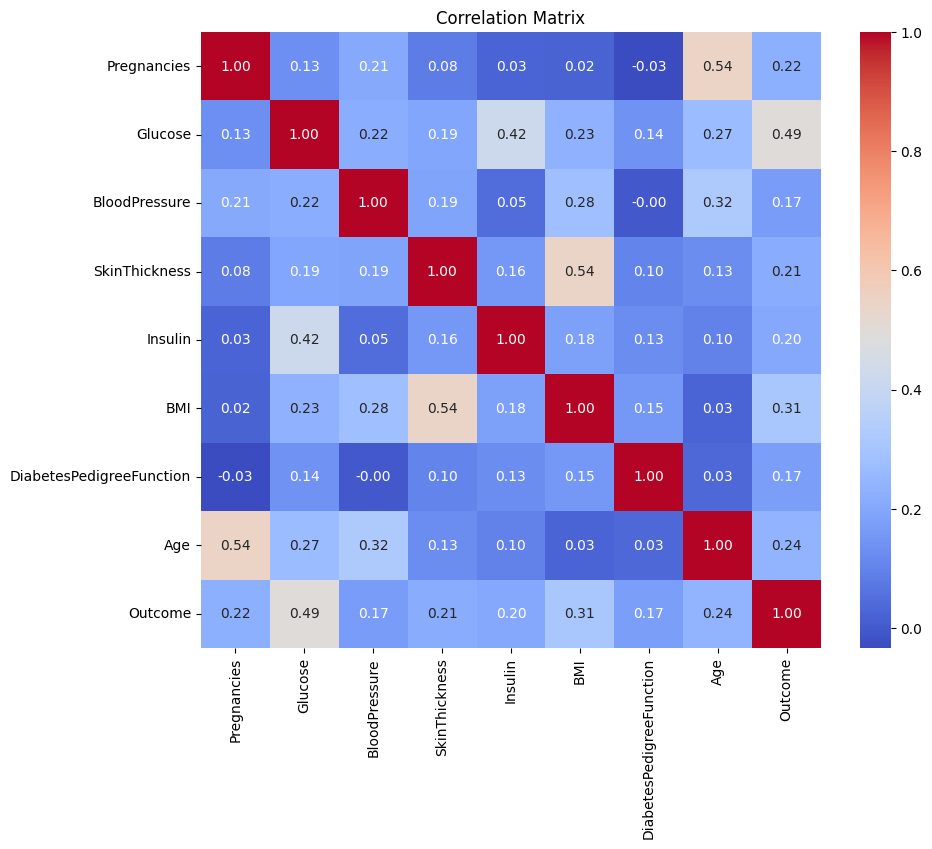

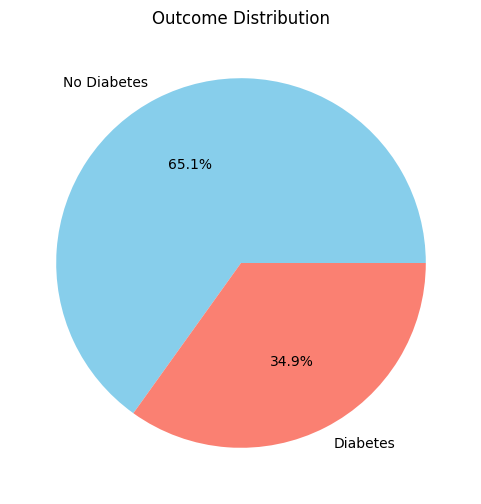


Data Shape After Outlier Removal: (332, 9)

Processed data saved as 'diabetes_processed.csv'


In [1]:
#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load Dataset
df = pd.read_csv('diabetes.csv') 
print("Initial Data Info:")
print(df.info())
print(df.head())

# Data Cleaning

# Check for missing values
print("\nMissing Values (%):")
print(df.isnull().sum() / df.shape[0] * 100)

# Replace zeros with NaN in columns where 0 is invalid
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Fill missing values with median
df.fillna(df.median(), inplace=True)

print("\nData Info After Cleaning:")
print(df.info())

# Visualizations

# Correlation Matrix
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Pie chart for Output variable 'Outcome'
outcome_counts = df['Outcome'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(outcome_counts, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Outcome Distribution')
plt.show()

# Outlier Detection and Removal using IQR
num_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("\nData Shape After Outlier Removal:", df.shape)

# Feature Scaling
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with scaled features
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['Outcome'] = y.values

# Save Processed Data
df_scaled.to_csv('diabetes_processed.csv', index=False)
print("\nProcessed data saved as 'diabetes_processed.csv'")
